# <center>Laboratorium Całki<br>Metody Numeryczne</center>

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as sci

# Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\sin^2(\cfrac{1}{x-1.01})dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=1$ przy pomocy następujących metod:  
    1. Metoda Prostokątów
    2. Metoda Trapezów - [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)
    3. Metoda Kwadratur - [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)
    2. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

In [2]:
def func(x):
    return np.sin(1/(x-1.01)) ** 2

In [3]:
# Metoda Prostokątów
def rect(a, b, n):
    res = 0.0
    dx = float((b-a)/n)
    while a < b:
        res += dx * func(a)
        a += dx
    return res

In [4]:
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_r = np.zeros(len(step))
time_std_r = np.zeros(len(step))
result_r = np.zeros(len(step))

for inx, stepp in enumerate(step):
    result_r[inx] = rect(0, 1, stepp)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_r[inx])
    saved_timing = %timeit -r 5 -n 10 -o rect(0, 1, stepp)
    time_avg_r[inx] = saved_timing.average
    time_std_r[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.6990302684350905
819 ns ± 447 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.69941546178899
5.62 µs ± 278 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.6785484841041157
52.6 µs ± 7.68 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.6755307299487198
571 µs ± 159 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------

In [5]:
# Metoda Trapezów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_t = np.zeros(len(step))
time_std_t = np.zeros(len(step))
result_t = np.zeros(len(step))

for inx, stepp in enumerate(step):
    dx = (0 - 1)/stepp
    x1 = np.linspace(0, 1, stepp)
    y1 = func(x1)
    result_t[inx] = sci.trapz(y1, x1, dx)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_t[inx])
    saved_timing = %timeit -r 5 -n 10 -o sci.trapz(y1, x1, dx)
    time_avg_t[inx] = saved_timing.average
    time_std_t[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.0
5.95 µs ± 1.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.7268511896084273
5.59 µs ± 438 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.6775930219803752
5.95 µs ± 723 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.675393284178893
The slowest run took 5.18 times longer than the fastest. This could mean that an intermediate result is being cached.
17.8 µs ± 13 

In [6]:
# Metoda quad
print('------------------------------------------------------------------------------')
result_q = sci.quad(func, 0, 1)
print(f'Wartość całki obliczona przez funkcje quad: {result_q[0]}')
print(f'Dokładność obliczenia całki: {result_q[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quad(func, 0, 1)
time_avg_q = saved_timing.average
time_std_q = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quad: 0.6755141541635237
Dokładność obliczenia całki: 7.366444165332977e-09
431 µs ± 56.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


In [7]:
# Metoda quadrature
print('------------------------------------------------------------------------------')
result_qe = sci.quadrature(func, 0, 1, maxiter=450)
print(f'Wartość całki obliczona przez funkcje quadrature: {result_qe[0]}')
print(f'Różnica wyników pomiędzy dwoma ostatnimi iteracjami: {result_qe[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quadrature(func, 0, 1, maxiter=450)
time_avg_qe = saved_timing.average
time_std_qe = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quadrature: 0.6755143270593807
Różnica wyników pomiędzy dwoma ostatnimi iteracjami: 1.1312937586716032e-08
3.6 ms ± 20.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


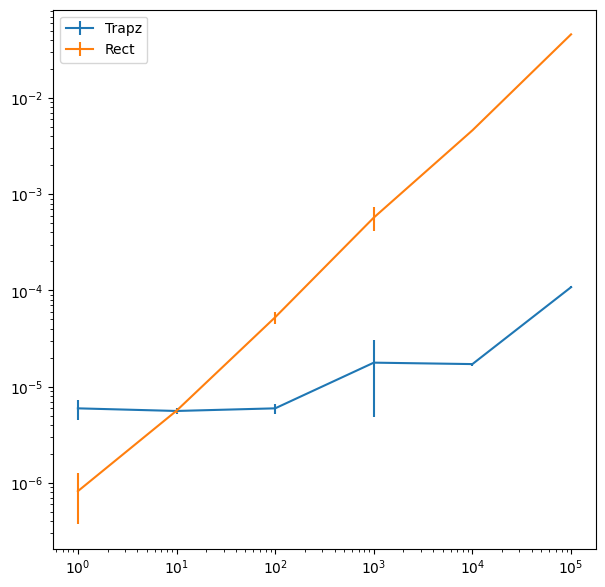

In [8]:
fig1, time = plt.subplots(figsize=(7,7))
time.errorbar(step, time_avg_t, yerr=time_std_t, label='Trapz')
time.errorbar(step, time_avg_r, yerr=time_std_r, label='Rect')
time.set(xscale='log', yscale='log')
time.legend()

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{-x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

In [9]:
def func(x):
    return np.exp(-x ** 2)

In [10]:
# Metoda Prostokątów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_r = np.zeros(len(step))
time_std_r = np.zeros(len(step))
result_r = np.zeros(len(step))

for inx, stepp in enumerate(step):
    result_r[inx] = rect(0, 1, stepp)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_r[inx])
    saved_timing = %timeit -r 5 -n 10 -o rect(0, 1, stepp)
    time_avg_r[inx] = saved_timing.average
    time_std_r[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
1.0
746 ns ± 232 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.8146047681903216
4.78 µs ± 256 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.7499786042621127
40.4 µs ± 1.22 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.747140131778599
426 µs ± 10 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------------

In [11]:
# Metoda Trapezów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_t = np.zeros(len(step))
time_std_t = np.zeros(len(step))
result_t = np.zeros(len(step))

for inx, stepp in enumerate(step):
    dx = (0 - 1)/stepp
    x1 = np.linspace(0, 1, stepp)
    y1 = func(x1)
    result_t[inx] = sci.trapz(y1, x1, dx)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_t[inx])
    saved_timing = %timeit -r 5 -n 10 -o sci.trapz(y1, x1, dx)
    time_avg_t[inx] = saved_timing.average
    time_std_t[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.0
5.88 µs ± 735 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.7460668679126695
6.22 µs ± 1.08 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.7468178769764183
5.57 µs ± 300 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.7468240713763741
The slowest run took 4.91 times longer than the fastest. This could mean that an intermediate result is being cached.
20.9 µs ± 1

In [12]:
# Metoda quad
print('------------------------------------------------------------------------------')
result_q = sci.quad(func, 0, 1)
print(f'Wartość całki obliczona przez funkcje quad: {result_q[0]}')
print(f'Dokładność obliczenia całki: {result_q[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quad(func, 0, 1)
time_avg_q = saved_timing.average
time_std_q = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quad: 0.7468241328124271
Dokładność obliczenia całki: 8.291413475940725e-15
10.4 µs ± 1.06 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


In [13]:
# Metoda quadrature
print('------------------------------------------------------------------------------')
result_qe = sci.quadrature(func, 0, 1, maxiter=450)
print(f'Wartość całki obliczona przez funkcje quadrature: {result_qe[0]}')
print(f'Różnica wyników pomiędzy dwoma ostatnimi iteracjami: {result_qe[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quadrature(func, 0, 1, maxiter=450)
time_avg_qe = saved_timing.average
time_std_qe = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quadrature: 0.7468241328901553
Różnica wyników pomiędzy dwoma ostatnimi iteracjami: 6.1239071591501215e-09
40.1 µs ± 2.28 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


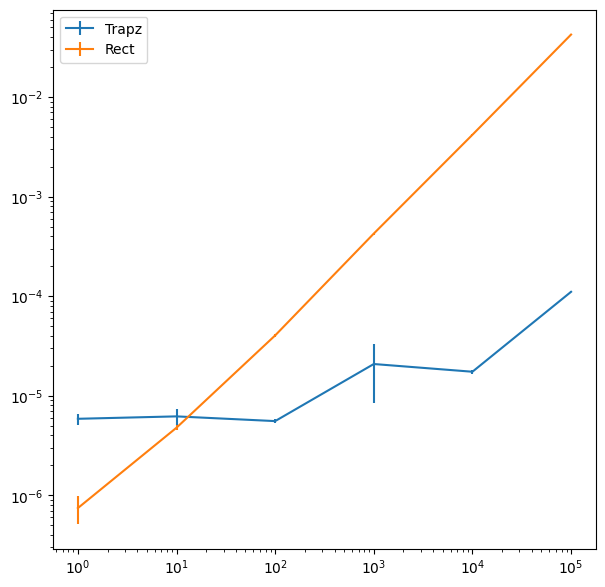

In [14]:
fig2, time = plt.subplots(figsize=(7, 7))
time.errorbar(step, time_avg_t, yerr=time_std_t, label='Trapz')
time.errorbar(step, time_avg_r, yerr=time_std_r, label='Rect')
time.set(xscale='log', yscale='log')
time.legend()

***Zadanie 3.***  
Dla funkcji 

$$f(x) = x^{x}$$

wyznacz numerycznie wartośc całki na przedziale $a = 1$, $b=2$  w  taki sam sposób jak w zadaniu 1.

In [15]:
def func(x):
    return x ** x

In [16]:
# Metoda Prostokątów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_r = np.zeros(len(step))
time_std_r = np.zeros(len(step))
result_r = np.zeros(len(step))

for inx, stepp in enumerate(step):
    result_r[inx] = rect(1, 2, stepp)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_r[inx])
    saved_timing = %timeit -r 5 -n 10 -o rect(1, 2, stepp)
    time_avg_r[inx] = saved_timing.average
    time_std_r[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
1.0
214 ns ± 76.6 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
1.9052531778355322
1.23 µs ± 258 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
2.035494339085559
9 µs ± 469 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
2.0529467155835412
83.3 µs ± 3.93 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------------

In [17]:
# Metoda Trapezów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_t = np.zeros(len(step))
time_std_t = np.zeros(len(step))
result_t = np.zeros(len(step))

for inx, stepp in enumerate(step):
    dx = (1 - 2)/stepp
    x1 = np.linspace(1, 2, stepp)
    y1 = func(x1)
    result_t[inx] = sci.trapz(y1, x1, dx)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_t[inx])
    saved_timing = %timeit -r 5 -n 10 -o sci.trapz(y1, x1, dx)
    time_avg_t[inx] = saved_timing.average
    time_std_t[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.0
6.25 µs ± 1.06 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
2.0563797068397416
5.89 µs ± 482 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
2.0504953157954335
5.59 µs ± 282 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
2.0504467165472993
The slowest run took 6.78 times longer than the fastest. This could mean that an intermediate result is being cached.
17.2 µs ± 1

In [18]:
# Metoda quad
print('------------------------------------------------------------------------------')
result_q = sci.quad(func, 1, 2)
print(f'Wartość całki obliczona przez funkcje quad: {result_q[0]}')
print(f'Dokładność obliczenia całki: {result_q[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quad(func, 1, 2)
time_avg_q = saved_timing.average
time_std_q = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quad: 2.0504462345347316
Dokładność obliczenia całki: 2.2764526203364127e-14
3.29 µs ± 186 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


In [19]:
# Metoda quadrature
print('------------------------------------------------------------------------------')
result_qe = sci.quadrature(func, 1, 2, maxiter=450)
print(f'Wartość całki obliczona przez funkcje quadrature: {result_qe[0]}')
print(f'Różnica wyników pomiędzy dwoma ostatnimi iteracjami: {result_qe[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quadrature(func, 1, 2, maxiter=450)
time_avg_qe = saved_timing.average
time_std_qe = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quadrature: 2.0504462345169436
Różnica wyników pomiędzy dwoma ostatnimi iteracjami: 2.317523062345117e-09
34.4 µs ± 1.08 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


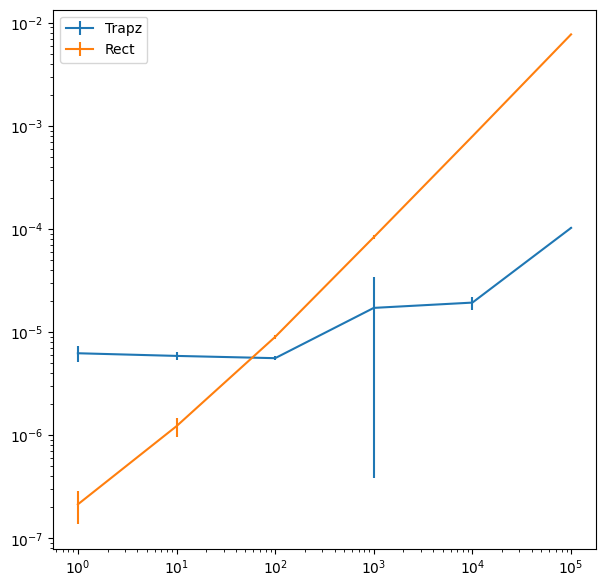

In [20]:
fig3, time = plt.subplots(figsize=(7, 7))
time.errorbar(step, time_avg_t, yerr=time_std_t, label='Trapz')
time.errorbar(step, time_avg_r, yerr=time_std_r, label='Rect')
time.set(xscale='log', yscale='log')
time.legend()

**Wnioski:**

Całkowanie numeryczne jest dobrą metodą na przybliżenie faktycznego wyniku całki oznaczonej, jednak nie daje nam ono stu procentowej dokładności. Algorytm całkowania poprzez metodę prostokątów jest zarazem najszybszy jak i najmniej dokładny, ale po wybraniu dostatecznie małego kroku dx osiąga on według mnie wystarczającą dokładność. Pozostałe algorytmy są coraz bardziej dokładne, ale równocześnie czas ich wykonania rośnie. Czas wykonania metody prostokątów i trapezów w pewnym momecie przekracza czas wykonania metod quad i quadrature przy podobnej dokładności. Z czego wynika że ich stosowanie jest odpowiednie, kiedy zależy nam na dokładnym wyniku.